<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

-----


## 📘 Valores y Vectores Propios

Los **eigenvalores** (valores propios) y **eigenvectores** (vectores propios) son conceptos fundamentales en álgebra lineal con aplicaciones en física, ingeniería, computación gráfica y más.  

- **Eigenvector**: Un vector que no cambia su dirección bajo una transformación lineal, solo se escala.  
- **Eigenvalor**: El factor de escala asociado al eigenvector.  


## 1. 🔍 ¿Qué son valores y vectores propios?

Dado un **vector** $ \vec{v} \in \mathbb{R}^n $ y una **matriz cuadrada** $ A \in \mathbb{R}^{n \times n}$, se dice que $\vec{v} $ es un **vector propio (eigenvector)** de $ A$ si:

$
A\vec{v} = \lambda \vec{v}
$

donde:
- $ \lambda $ es el **valor propio (eigenvalue)** asociado al vector $ \vec{v} $.
- $ \vec{v} \neq \vec{0} $

---

## 2. 🧠 Interpretación geométrica

- El vector propio $ \vec{v} $ **no cambia de dirección** al ser transformado por la matriz $ A $, solo puede escalarse (por$ \lambda $).
- En el plano, esto implica que una transformación lineal (como rotar, escalar, estirar o comprimir) puede **mantener inalterada** la dirección de algunos vectores. Esos son los vectores propios.

---

## 3. ✍️ Ejemplo práctico

Consideremos la matriz:

$
A = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$

Queremos encontrar $ \lambda $ y $ \vec{v} $ tal que:

$
A\vec{v} = \lambda \vec{v}
$

### Paso 1: Resolver el polinomio característico
Resolvemos la **ecuación característica**:  

$
\det(A - \lambda I) = 0
$

donde:  
- $ I $ es la matriz identidad.  
- $ \det $ denota el determinante.  

**Ejemplo**:  
Sea $ A = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} $.  

1. Calculamos $A - \lambda I $:  

$
A - \lambda I = \begin{pmatrix} 2 - \lambda & 1 \\ 1 & 2 - \lambda \end{pmatrix}
$ 

2. Hallamos el determinante:  

$
\det(A - \lambda I) = (2 - \lambda)^2 - 1 = \lambda^2 - 4\lambda + 3 = 0
$ 

3. Resolviendo la ecuación cuadrática:  

$
\lambda = 1 \quad \text{y} \quad \lambda = 3
$ 

→ **Eigenvalores**: $ \lambda_1 = 1 $, $ \lambda_2 = 3 $.  
### Paso 2: Encontrar los vectores propios

Para cada $ \lambda $, resolvemos:  

$
(A - \lambda I) \mathbf{v} = \mathbf{0}
$


#### **Para $ \lambda_1 = 1 $:**  
$
\begin{pmatrix} 2 - 1 & 1 \\ 1 & 2 - 1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \mathbf{0}
$

Sistema de ecuaciones:  
$
v_1 + v_2 = 0 \implies v_1 = -v_2
$ 

→ **Eigenvector**: $ \mathbf{v}_1 = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$ (o cualquier múltiplo).  

#### **Para $ \lambda_2 = 3 $:**  
$
\begin{pmatrix} -1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \mathbf{0}
$ 

Sistema de ecuaciones:  
$
-v_1 + v_2 = 0 \implies v_1 = v_2
$

→ **Eigenvector**: $ \mathbf{v}_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix} $.  

---

---


## 🧠 ¿Qué es PCA?

**PCA (Principal Component Analysis)** es un método estadístico que permite:

- **Reducir la dimensionalidad** de los datos,
- Conservando la **máxima cantidad de varianza** posible,
- A través de una **transformación lineal** que rota el sistema de coordenadas hacia las **direcciones principales de variación**.

---
Dado un conjunto de datos con múltiples variables, PCA busca encontrar un conjunto de **vectores ortogonales** (vectores propios), llamados **componentes principales**, que describen la dirección de mayor varianza en los datos.

---

## 🧮 Notación inicial

Sea:
- $ X \in \mathbb{R}^{n \times p} $ la **matriz de datos** con:
  - $ n $ observaciones (filas),
  - $ p $ variables (columnas).

Cada fila $ \vec{x}_i \in \mathbb{R}^p $ representa una observación.

---

## ⚙️ PCA paso a paso

---

### 📌 Paso 1: Centrar los datos (restar la media)

Para eliminar sesgos y trabajar con datos respecto al origen:

$
\mu = \frac{1}{n} \sum_{i=1}^n \vec{x}_i \in \mathbb{R}^p
$

$
X_c = X - \vec{1} \mu^\top
$

donde:
- $ X_c $ es la **matriz centrada**,
- $ \vec{1} \in \mathbb{R}^{n \times 1} $ es un vector columna de unos.




In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)

# Parámetros de la distribución
media = [5, 3]              # Media de x1 y x2
cov = [[1, 0.8], [0.8, 1]]  # Matriz de covarianza

# Generar 500 muestras
x1, x2 = np.random.multivariate_normal(media, cov, 500).T
X = np.vstack((x1,x2)).T

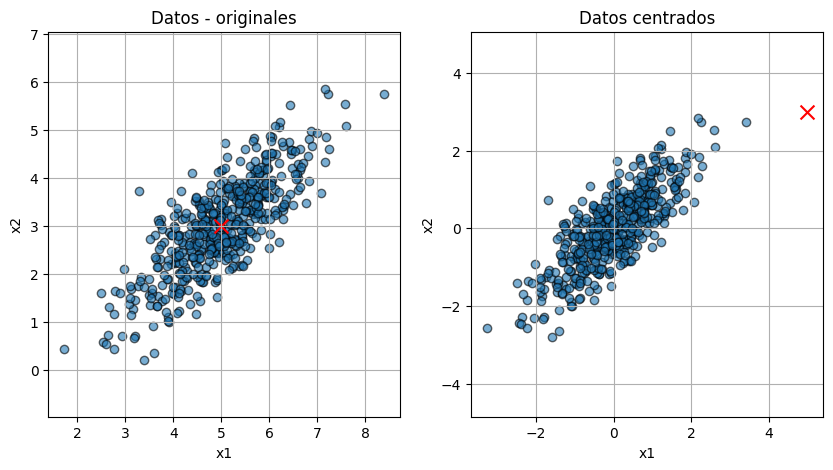

In [91]:
# Graficar
plt.figure(figsize=(10, 5))

mu = X.mean(axis=0)

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], alpha=0.6, edgecolors='k')
plt.scatter(mu[0],mu[1], color='red', marker='x', s=100, label=f'({mu[0]}, {mu[1]})')
plt.title("Datos - originales")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axis('equal')


##########
X_bar = X - mu

#########
plt.subplot(122)
plt.scatter(X_bar[:,0], X_bar[:,1], alpha=0.6, edgecolors='k')
plt.scatter(mu[0],mu[1], color='red', marker='x', s=100, label=f'({mu[0]}, {mu[1]})')
plt.title("Datos centrados")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axis('equal')
plt.show()



In [94]:
np.corrcoef(X.T)

array([[1.        , 0.79075079],
       [0.79075079, 1.        ]])

### 📌 Paso 2: Calcular la matriz de covarianza

La matriz de covarianza describe cómo varían conjuntamente las variables:

$
\Sigma = \frac{1}{n-1} X_c^\top X_c \in \mathbb{R}^{p \times p}
$

Cada elemento $ \Sigma_{ij} $ representa la covarianza entre la variable $ i $ y la variable $ j $.

---

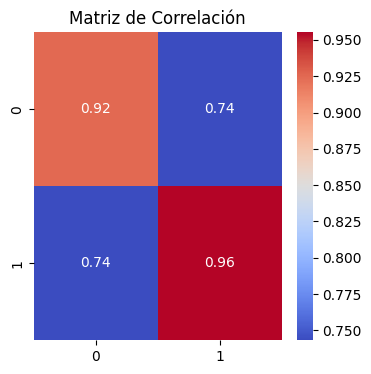

In [95]:
import seaborn as sns
matriz_covarianza = np.cov(X_bar.T)
plt.figure(figsize=(4, 4))
sns.heatmap(matriz_covarianza, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### 📌 Paso 3: Obtener los vectores y valores propios de $ \Sigma $

$
\Sigma \vec{v}_i = \lambda_i \vec{v}_i
$

- $ \vec{v}_i $ es el **i-ésimo vector propio** (componente principal),
- $ \lambda_i $ es su **valor propio** correspondiente (varianza explicada por esa dirección).

Los vectores $ \vec{v}_i $ son **ortogonales** y se pueden ordenar según $ \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_p $.

---

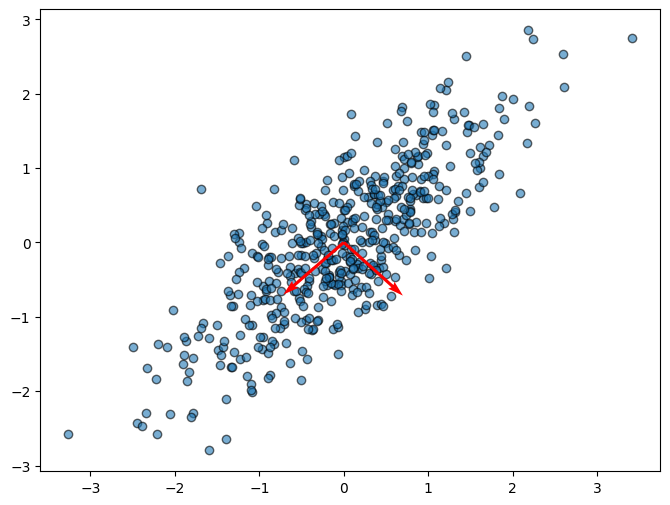

In [96]:
valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)

plt.figure(figsize=(8, 6))
plt.scatter(X_bar[:,0], X_bar[:,1], alpha=0.6, edgecolors='k')
plt.quiver(0, 0, vectores_propios[0,0], vectores_propios[0,1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
plt.quiver(0, 0, vectores_propios[1,0], vectores_propios[1,1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005)

plt.show()    

In [55]:
vectores_propios

array([[-0.71428841, -0.69985146],
       [ 0.69985146, -0.71428841]])

### 📌 Paso 4: Seleccionar los primeros \( k \) vectores propios

Construir la **matriz de proyección** $ V_k \in \mathbb{R}^{p \times k} $ con los primeros $ k $ vectores propios como columnas.

---

In [97]:
# Ordenar autovalores y autovectores
indice_ordenado = valores_propios.argsort()[::-1]
vectores_propios_ordenados = vectores_propios[:, indice_ordenado]

# Seleccionar k componentes principales
k = 2  # Seleccionar el número de componentes
vectores_principales = vectores_propios_ordenados[:, :k]

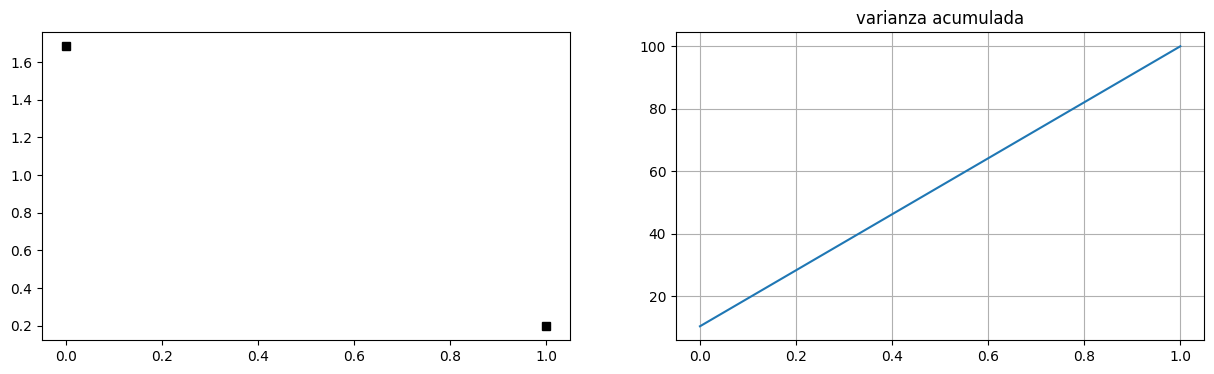

In [98]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(valores_propios[indice_ordenado],'sk')

tot = valores_propios.cumsum()/valores_propios.sum()*100
plt.subplot(122)
plt.plot(tot)
plt.title("varianza acumulada")
plt.grid()

### 📌 Paso 5: Proyectar los datos al nuevo espacio

$
Z = X_c V_k \in \mathbb{R}^{n \times k}
$

Donde:
- $ Z $ es la **representación de los datos en el nuevo sistema de coordenadas** (espacio reducido).

---

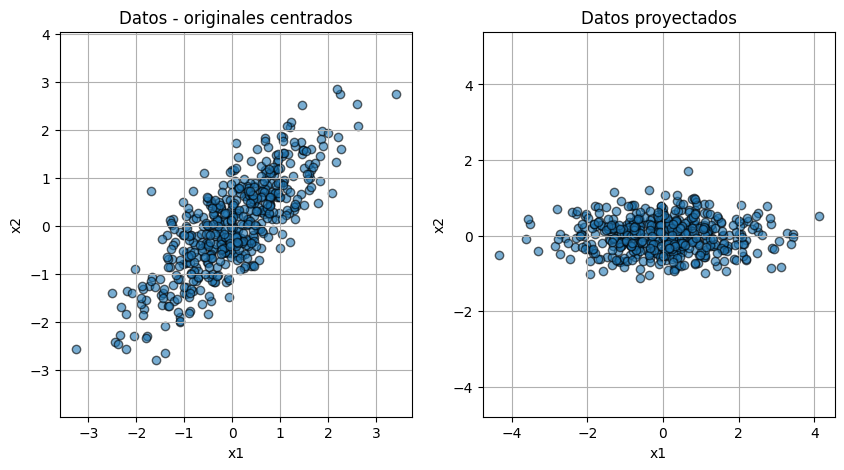

In [99]:
Z = np.matmul(X_bar,vectores_principales)

# Graficar
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(X_bar[:,0], X_bar[:,1], alpha=0.6, edgecolors='k')
plt.title("Datos - originales centrados")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axis('equal')


##########
X_bar = X - mu

#########
plt.subplot(122)
plt.scatter(Z[:,0], Z[:,1], alpha=0.6, edgecolors='k')
plt.title("Datos proyectados")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axis('equal')
plt.show()



In [100]:
np.corrcoef(Z.T)

array([[ 1.00000000e+00, -1.74786913e-16],
       [-1.74786913e-16,  1.00000000e+00]])

In [101]:
np.corrcoef(X.T)

array([[1.        , 0.79075079],
       [0.79075079, 1.        ]])


### 📌 Paso 6 (opcional): Reconstruir los datos (aproximación)

Si deseas reconstruir los datos originales desde la representación reducida:

$
\hat{X} = Z V_k^\top + \vec{1} \mu^\top
$

---

(1.3913865532890106,
 8.732565979304333,
 -0.06868175218404343,
 6.142418283111188)

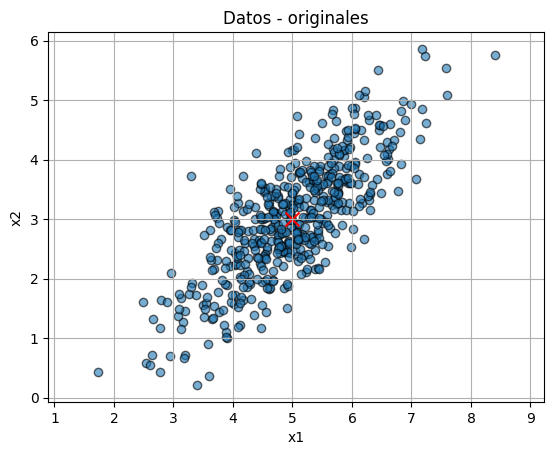

In [106]:
X_r = np.matmul(Z,vectores_principales.T)+mu

plt.scatter(X_r[:,0], X_r[:,1], alpha=0.6, edgecolors='k')
plt.scatter(mu[0],mu[1], color='red', marker='x', s=100, label=f'({mu[0]}, {mu[1]})')

plt.title("Datos - originales")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axis('equal')

In [104]:
X_r.mean(axis=0)

array([4.98549574, 3.00767147])

In [105]:
mu

array([4.98549574, 3.00767147])

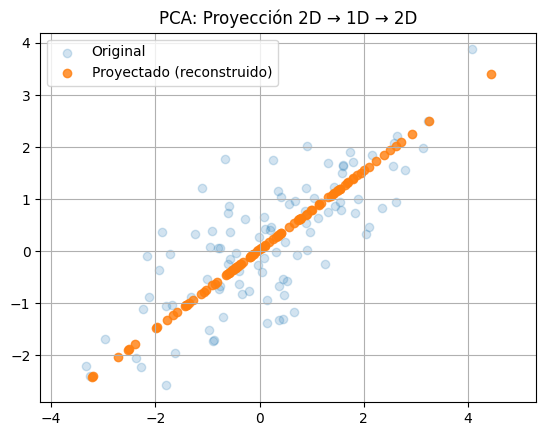

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de datos 2D correlacionados
np.random.seed(42)
X = np.random.multivariate_normal([0, 0], [[3, 2], [2, 2]], size=100)

# Paso 1: Centrado
X_mean = np.mean(X, axis=0)
X_c = X - X_mean

# Paso 2: Covarianza
cov_matrix = np.cov(X_c.T)

# Paso 3: Valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Ordenar descendente
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Paso 4 y 5: Proyección a 1D
k = 1
V_k = eigenvectors[:, :k]
Z = X_c @ V_k

# Paso 6: Reconstrucción
X_hat = Z @ V_k.T + X_mean

# Visualización
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label="Original")
plt.scatter(X_hat[:, 0], X_hat[:, 1], alpha=0.8, label="Proyectado (reconstruido)")
plt.legend()
plt.title("PCA: Proyección 2D → 1D → 2D")
plt.axis('equal')
plt.grid()
plt.show()

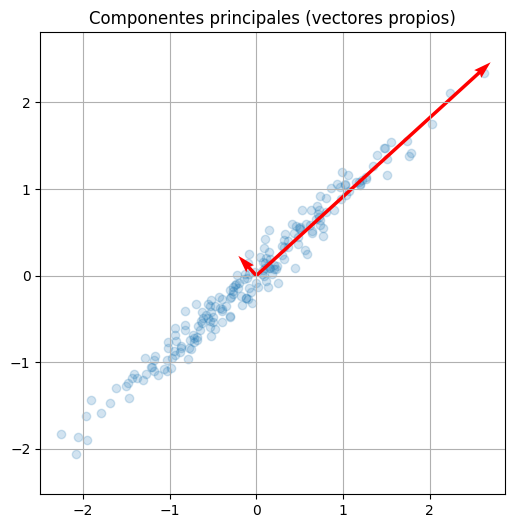

In [87]:
from sklearn.decomposition import PCA

# Datos aleatorios correlacionados
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200))

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T)

# Mostrar dirección de componentes principales
plt.figure(figsize=(6,6))
plt.scatter(X[0], X[1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red')
plt.grid()
plt.axis('equal')
plt.title("Componentes principales (vectores propios)")
plt.show()